In [1]:
#Mounting the Goodgle Drive to access the drive contents
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout
from tensorflow.keras.utils import plot_model

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load train data
train = pd.read_csv('/content/gdrive/MyDrive/Sachin : CAIR Internship/Datasets and Code/train.csv')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#drop the Nan Values
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
# using dropna() function  
train = train.dropna()

In [6]:
#Get the Depndent feature
X_train=train.drop('label',axis=1)
y_train=train['label']

In [7]:
# set vocabulary size
vo_size=500
messages=X_train.copy()
messages.reset_index(inplace=True)

In [8]:
#dataset Preprocessing
ps =PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print("Status: %s / %s" %(i, len(messages)), end="\r")
    review = re.sub('[^a-zA-Z]', ' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
# one hot representation
onehot_rep = [one_hot(words, vo_size) for words in corpus]

In [10]:
# pad_sequences
sent_length = 1000
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
print(embedded_doc)

[[  0   0   0 ... 345   9 359]
 [  0   0   0 ... 421 491 451]
 [  0   0   0 ... 411  67 201]
 ...
 [  0   0   0 ... 226 249 332]
 [  0   0   0 ... 242 219 313]
 [  0   0   0 ...  66 211 210]]


In [11]:
# model 1 build 
embedding_vector_feature = 100
model=Sequential()
model.add(Embedding(vo_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(200))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         50000     
_________________________________________________________________
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 291,001
Trainable params: 291,001
Non-trainable params: 0
_________________________________________________________________
None


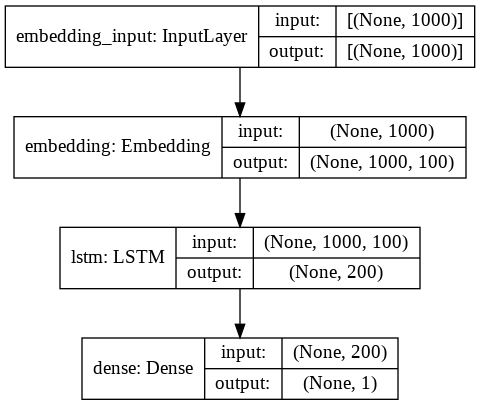

In [12]:
# Plot text model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [13]:
# check shape 
len(embedded_doc),y_train.shape

(18285, (18285,))

In [14]:
# final data for NN
X_final=np.array(embedded_doc)
y_final=np.array(y_train)
X_final.shape,y_final.shape

((18285, 1000), (18285,))

In [15]:
# train model 1
history = model.fit(X_final,y_final, validation_split=0.2, epochs=10, batch_size=256)

Epoch 1/10
58/58 [==============================] - 21s 228ms/step - loss: 0.5684 - accuracy: 0.7237 - val_loss: 0.3989 - val_accuracy: 0.8171
Epoch 2/10
58/58 [==============================] - 13s 222ms/step - loss: 0.3365 - accuracy: 0.8563 - val_loss: 0.3006 - val_accuracy: 0.8772
Epoch 3/10
58/58 [==============================] - 13s 223ms/step - loss: 0.2891 - accuracy: 0.8845 - val_loss: 0.3199 - val_accuracy: 0.8581
Epoch 4/10
58/58 [==============================] - 13s 224ms/step - loss: 0.3030 - accuracy: 0.8720 - val_loss: 0.3416 - val_accuracy: 0.8458
Epoch 5/10
58/58 [==============================] - 13s 225ms/step - loss: 0.2789 - accuracy: 0.8848 - val_loss: 0.3464 - val_accuracy: 0.8668
Epoch 6/10
58/58 [==============================] - 13s 226ms/step - loss: 0.2749 - accuracy: 0.8895 - val_loss: 0.2989 - val_accuracy: 0.8726
Epoch 7/10
58/58 [==============================] - 13s 226ms/step - loss: 0.2623 - accuracy: 0.8952 - val_loss: 0.2898 - val_accuracy: 0.8772

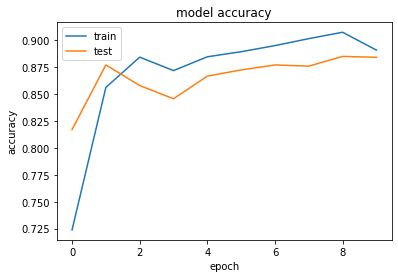

In [16]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

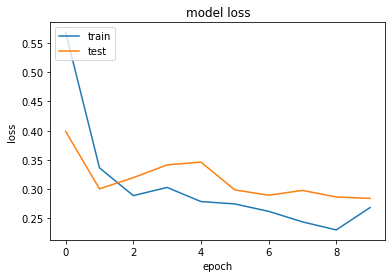

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# model 2 build 
model = Sequential()
model.add(Embedding(vo_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100, return_sequences=True,name='lstm_layer'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

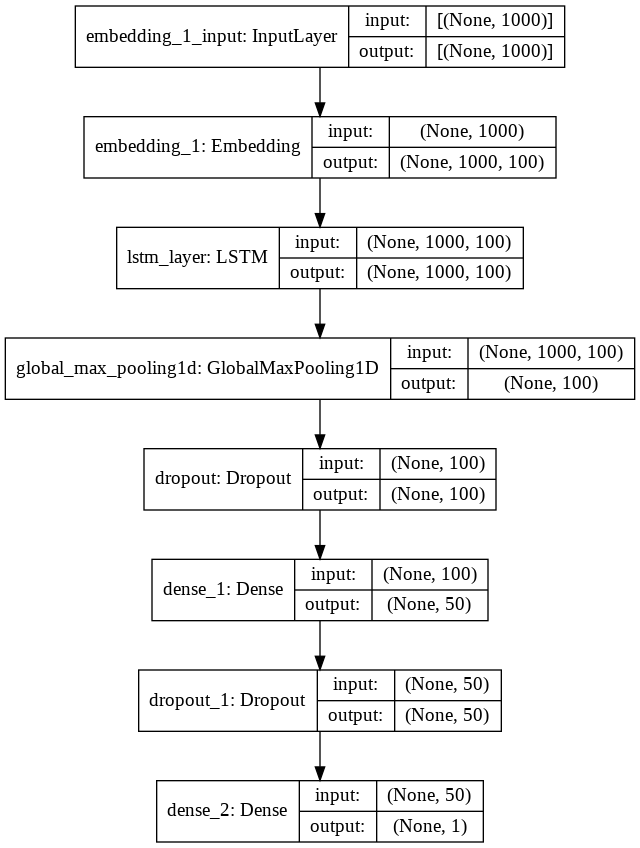

In [19]:
# Plot text model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [20]:
# train model 2
history = model.fit(X_final,y_final, validation_split=0.2, epochs=10, batch_size=256)

Epoch 1/10
58/58 [==============================] - 10s 141ms/step - loss: 0.6774 - accuracy: 0.5694 - val_loss: 0.6846 - val_accuracy: 0.5562
Epoch 2/10
58/58 [==============================] - 8s 134ms/step - loss: 0.6576 - accuracy: 0.5803 - val_loss: 0.6679 - val_accuracy: 0.7246
Epoch 3/10
58/58 [==============================] - 8s 134ms/step - loss: 0.5813 - accuracy: 0.6921 - val_loss: 0.4824 - val_accuracy: 0.7725
Epoch 4/10
58/58 [==============================] - 8s 134ms/step - loss: 0.3841 - accuracy: 0.8343 - val_loss: 0.3350 - val_accuracy: 0.8611
Epoch 5/10
58/58 [==============================] - 8s 134ms/step - loss: 0.3214 - accuracy: 0.8647 - val_loss: 0.2893 - val_accuracy: 0.8811
Epoch 6/10
58/58 [==============================] - 8s 135ms/step - loss: 0.2792 - accuracy: 0.8886 - val_loss: 0.2818 - val_accuracy: 0.8852
Epoch 7/10
58/58 [==============================] - 8s 135ms/step - loss: 0.2591 - accuracy: 0.8955 - val_loss: 0.2671 - val_accuracy: 0.8893
Epoch

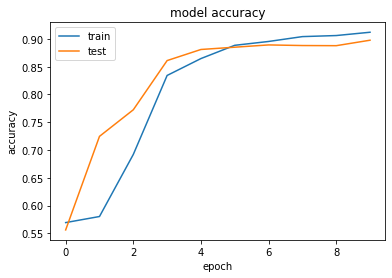

In [21]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

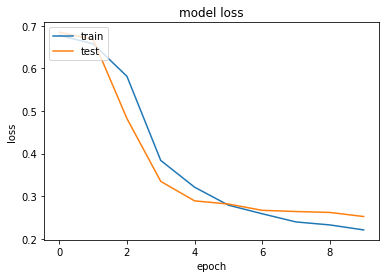

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# load test
test = pd.read_csv('/content/gdrive/MyDrive/Sachin : CAIR Internship/Datasets and Code/test.csv')
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [24]:
# check na in test
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [25]:
# using dropna() function  
test = test.dropna()

In [26]:
# prepare test data for NN
X_test=test
messages=X_test.copy()
messages.reset_index(inplace=True)
ps =PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print("Status: %s / %s" %(i, len(messages)), end="\r")
    review = re.sub('[^a-zA-Z]', ' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
onehot_rep = [one_hot(words, vo_size) for words in corpus]
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
X_test_final=np.array(embedded_doc)

In [27]:
# predict final
y_pred_final=model.predict_classes(X_test_final)
y_pred_final = pd.DataFrame(y_pred_final)
submit = pd.concat([test['id'].reset_index(drop=True), y_pred_final], axis=1)
submit.rename(columns={ submit.columns[1]: "label" }, inplace = True)
submit.to_csv('submit_2.csv', index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
# Save model
model.save_weights("model_text.h5")